In [79]:
#참고
# https://www.tensorflow.org/tutorials/keras/regression?hl=ko
# https://www.kaggle.com/code/ktakuma/boston-house-prices-dnn-regression
# https://www.kaggle.com/code/systemvaz/house-prices-with-tensorflow-dnn

In [2]:
import numpy as np
import pandas as pd 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [83]:
# seaborn 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
df = pd.read_csv('C:\Temp\바탕화면\ssafy9\seuri\git_TIL\Midnight-ML\myprac\prac1\부동산\sl_o.csv')
print(df.shape)
df.head()

(3591649, 12)


,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,구분,한국은행기준금리,종가,년도,건물나이
0,0,9,0,77.75,33000,0,2.0,0,2.5,1941.15,2014.0,26.0
1,0,9,0,79.97,34000,0,2.0,0,2.5,1941.15,2014.0,27.0
2,0,9,0,79.97,28000,0,1.0,0,2.5,1941.15,2014.0,27.0
3,0,9,0,79.97,35000,0,2.0,0,2.5,1941.15,2014.0,27.0
4,0,9,1,104.43,40000,40,8.0,0,2.5,1941.15,2014.0,30.0


In [4]:
df['환산_보증금_월세'] = df.apply(lambda x: x['보증금(만원)'] + x['월세(만원)']*12*20, axis='columns')
df = df.drop(['보증금(만원)','월세(만원)'], axis=1)
df.head()

,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),층,구분,한국은행기준금리,종가,년도,건물나이,환산_보증금_월세
0,0,9,0,77.75,2.0,0,2.5,1941.15,2014.0,26.0,33000.0
1,0,9,0,79.97,2.0,0,2.5,1941.15,2014.0,27.0,34000.0
2,0,9,0,79.97,1.0,0,2.5,1941.15,2014.0,27.0,28000.0
3,0,9,0,79.97,2.0,0,2.5,1941.15,2014.0,27.0,35000.0
4,0,9,1,104.43,8.0,0,2.5,1941.15,2014.0,30.0,49600.0


<Axes: >

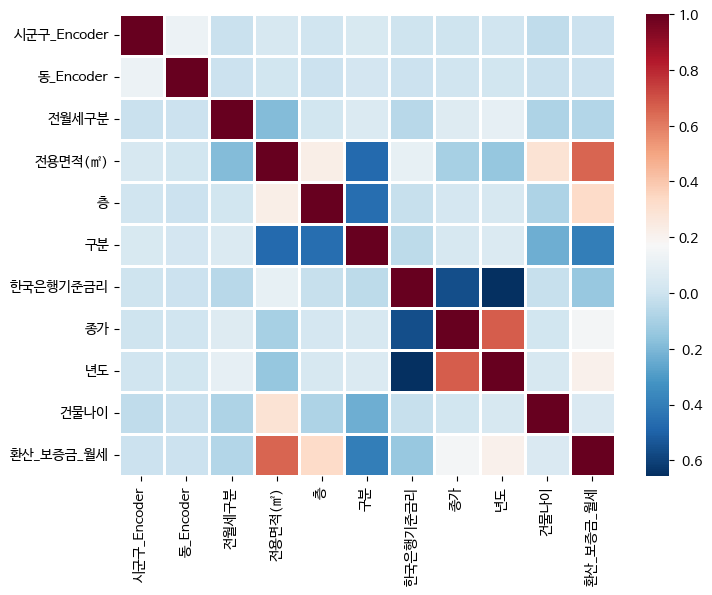

In [84]:
import warnings
warnings.filterwarnings('ignore')

# Show correlation matrix
corr = df.corr()

# Show headmap
plt.figure(figsize=(8,6))
plt.rc('font', family='NanumBarunGothic')  #한글깨짐방지
sns.heatmap(corr,cmap='RdBu_r',linewidth=1)

In [117]:
# train_dataset = df.sample(frac=0.8,random_state=0)
# test_dataset = df.drop(train_dataset.index)

In [ ]:
# train_dataset.head()

In [ ]:
# test_dataset.head()

In [5]:
X = df.drop('환산_보증금_월세', axis=1)
y = df['환산_보증금_월세']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
X_train

,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),층,구분,한국은행기준금리,종가,년도,건물나이
2634528,8,362,0,57.97,11.0,0,1.50,1941.49,2015.0,26.0
588497,1,100,1,84.93,12.0,0,3.00,1996.21,2012.0,10.0
1999091,6,28,1,18.37,9.0,1,1.75,2041.04,2018.0,7.0
2924794,8,165,0,71.89,4.0,0,3.00,2293.61,2022.0,34.0
1518387,17,163,1,45.56,4.0,2,1.50,1967.79,2019.0,10.0
...,...,...,...,...,...,...,...,...,...,...
807448,1,38,0,57.10,11.0,0,3.00,2106.70,2011.0,17.0
1882643,18,213,0,21.21,9.0,2,1.50,2566.46,2018.0,3.0
1762236,14,272,0,64.52,4.0,2,1.50,2295.26,2018.0,25.0
2954588,2,130,1,58.99,21.0,0,3.25,2472.53,2022.0,12.0


In [8]:
y_train

2634528     21000.0
588497      27200.0
1999091     13400.0
2924794     33000.0
1518387     18200.0
             ...   
807448      17000.0
1882643     17500.0
1762236     27000.0
2954588     40000.0
1332511    101400.0
Name: 환산_보증금_월세, Length: 2693736, dtype: float64

In [ ]:
# train_stats = train_dataset.describe()
# train_stats = train_stats.transpose()
# train_stats

In [104]:
# 예측할 레이블
# train_labels = train_dataset.pop('환산_보증금_월세')
# test_labels = test_dataset.pop('환산_보증금_월세')

In [ ]:
# train_dataset

In [ ]:
# train_labels

In [108]:
# # 정규화
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

# normed_train_data = normed_train_data.drop('환산_보증금_월세', axis=1)
# normed_test_data = normed_test_data.drop('환산_보증금_월세', axis=1)

In [ ]:
# normed_test_data

In [110]:
# 모델 만들기
# def build_model():
#   model = keras.Sequential([
#     layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1)
#   ])

#   optimizer = tf.keras.optimizers.RMSprop(0.001)

#   model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
#   return model

In [9]:
model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(10,)))
# model.add(BatchNormalization())
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(BatchNormalization())
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Set EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=500)

In [111]:
# model = build_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,201
Trainable params: 3,009
Non-trainabl

In [ ]:
# example_batch = X_train[:10]
# example_result = model.predict(example_batch)
# example_result

In [11]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.2, batch_size=64, verbose=0)